<a href="https://colab.research.google.com/github/PunPK/AI-SleepDriving/blob/main/eye_data_resnet18_fastai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import os.path as op
import shutil
from glob import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm.auto import tqdm

from torchvision import datasets, models, transforms
from torch.utils.data import DataLoader
from sklearn.model_selection import train_test_split

In [ ]:
!pip install -Uqq fastbook

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 36.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 40.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 474.6/474.6 kB 51.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 75.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 15.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 26.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 19.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 79.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 25.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 80.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 15.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 32.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
import fastbook
#fastbook.setup_book()

In [ ]:
from fastbook import *

In [ ]:
fields = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    get_y=parent_label,
    splitter=RandomSplitter(valid_pct=0.2, seed=42), # GrandparentSplitter(valid_name='validation')
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms()
)

In [ ]:
get_image_files("/content/drive/MyDrive/DataAiEye")

(#1452) [Path('/content/drive/MyDrive/DataAiEye/close eye/_116.jpg'),Path('/content/drive/MyDrive/DataAiEye/close eye/_115.jpg'),Path('/content/drive/MyDrive/DataAiEye/close eye/_120.jpg'),Path('/content/drive/MyDrive/DataAiEye/close eye/_107.jpg'),Path('/content/drive/MyDrive/DataAiEye/close eye/_129.jpg'),Path('/content/drive/MyDrive/DataAiEye/close eye/_172.jpg'),Path('/content/drive/MyDrive/DataAiEye/close eye/_161.jpg'),Path('/content/drive/MyDrive/DataAiEye/close eye/_31.jpg'),Path('/content/drive/MyDrive/DataAiEye/close eye/_534.jpg'),Path('/content/drive/MyDrive/DataAiEye/close eye/_710.jpg')...]

In [ ]:
parent_label("/content/drive/MyDrive/DataAiEye")

'MyDrive'

In [ ]:
dls = fields.dataloaders("/content/drive/MyDrive/DataAiEye")

In [ ]:
dls.vocab

['close eye', 'open eye']

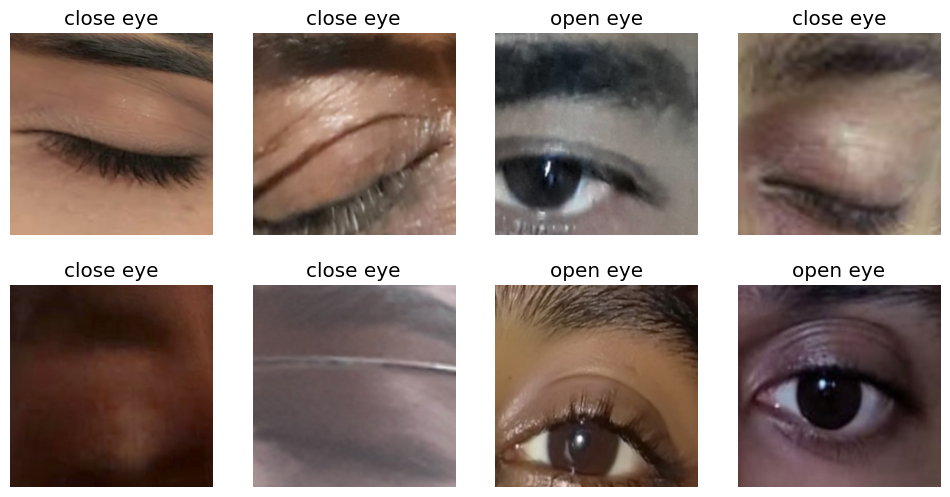

In [ ]:
dls.train.show_batch(max_n=8, nrows=2)

In [ ]:
learner = cnn_learner(dls, resnet18, metrics=[error_rate, accuracy])

/usr/local/lib/python3.10/dist-packages/fastai/vision/learner.py:288: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd

SuggestedLRs(valley=0.0012022644514217973)

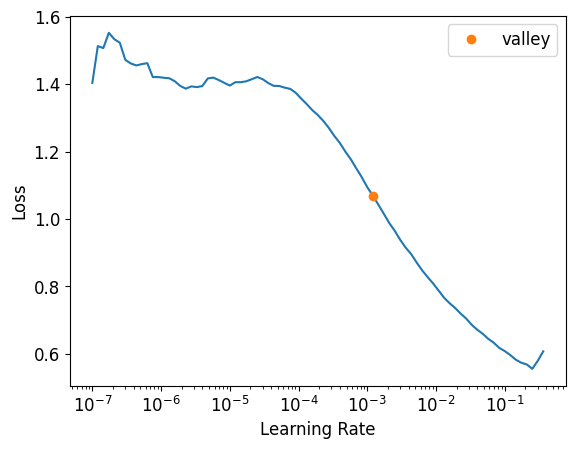

In [ ]:
learner.lr_find()

In [ ]:
learner.fine_tune(epochs=10, freeze_epochs=1, base_lr=0.0012022644514217973)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.742538,0.120006,0.034483,0.965517,01:12


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.150430,0.058341,0.020690,0.979310,00:11
1,0.125424,0.058086,0.017241,0.982759,00:12
2,0.098064,0.040397,0.013793,0.986207,00:12
3,0.078611,0.039445,0.010345,0.989655,00:13
4,0.059358,0.026339,0.003448,0.996552,00:10
5,0.048674,0.011024,0.003448,0.996552,00:12
6,0.037655,0.004983,0.000000,1.000000,00:12
7,0.030342,0.003329,0.000000,1.000000,00:12
8,0.026280,0.003615,0.000000,1.000000,00:10
9,0.027510,0.004248,0.000000,1.000000,00:12


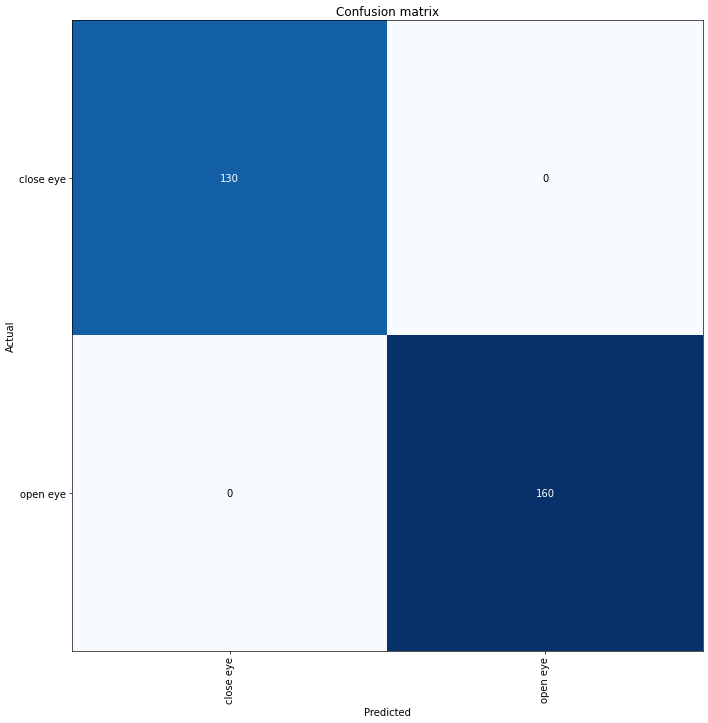

In [ ]:
interp = ClassificationInterpretation.from_learner(learner)
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [ ]:
interp.most_confused(min_val=5)

[]

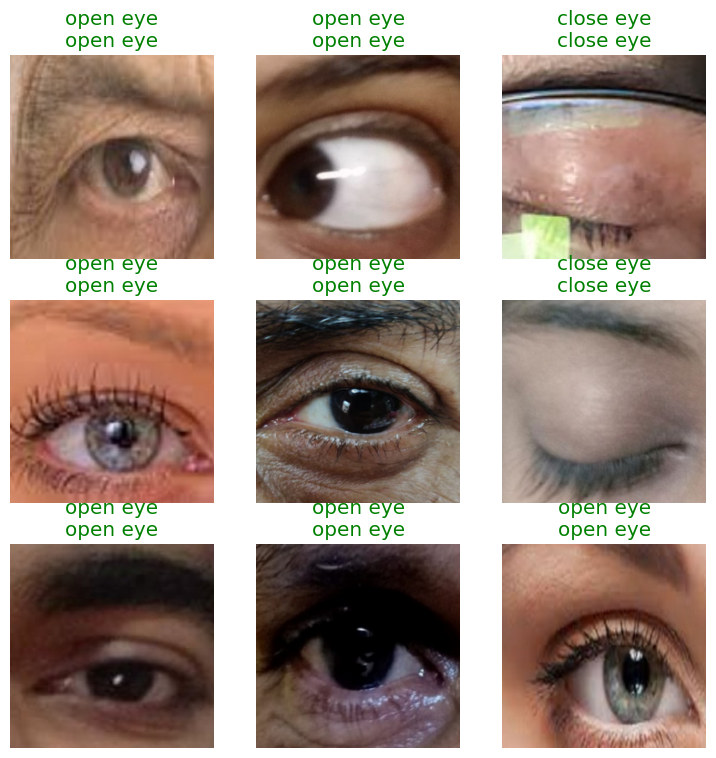

In [ ]:
learner.show_results(shuffle=True)

# save

In [ ]:
learner.export("eye_data_resnet18_fastai.pkl")